In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# extracting data from .csv file

In [3]:
zomato_data=pd.read_excel('zomato.xlsx')

In [4]:
zomato_data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [5]:
m1=zomato_data.copy()

In [6]:
m1.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
#DATA CLEANING

In [8]:
m1.info()    #checking the type of columns and overall info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [9]:
#dropping the unwanted columns

In [10]:
m1.drop('url',axis=1,inplace=True)

In [11]:
m1.drop('phone',axis=1,inplace=True)

In [12]:
m1.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [13]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      51717 non-null  object 
 1   name                         51717 non-null  object 
 2   online_order                 51717 non-null  object 
 3   book_table                   51717 non-null  object 
 4   rate                         43942 non-null  object 
 5   votes                        51717 non-null  int64  
 6   location                     51696 non-null  object 
 7   rest_type                    51490 non-null  object 
 8   dish_liked                   23639 non-null  object 
 9   cuisines                     51672 non-null  object 
 10  approx_cost(for two people)  51371 non-null  float64
 11  reviews_list                 51717 non-null  object 
 12  menu_item                    51717 non-null  object 
 13  listed_in(type) 

In [14]:
m1.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [15]:
m1['rate'].unique()    #cleaning the rate column

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
m1['rate'].replace(to_replace=r'/5',value='',regex=True,inplace=True)

In [17]:
m1['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [18]:
def qw(yyy):
    if yyy=='NEW' or yyy=='-':
        return np.nan
    else:
        return float(yyy)

In [19]:
m1['rate']=m1['rate'].apply(qw)

In [20]:
m1['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [21]:
avg_rate=m1['rate'].mean()

In [22]:
avg=round(avg_rate,1)

In [23]:
avg

3.7

In [24]:
m1['rate'].fillna(avg,inplace=True)

In [25]:
m1['rate'].unique()   #rate column is now cleaned 

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [26]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      51717 non-null  object 
 1   name                         51717 non-null  object 
 2   online_order                 51717 non-null  object 
 3   book_table                   51717 non-null  object 
 4   rate                         51717 non-null  float64
 5   votes                        51717 non-null  int64  
 6   location                     51696 non-null  object 
 7   rest_type                    51490 non-null  object 
 8   dish_liked                   23639 non-null  object 
 9   cuisines                     51672 non-null  object 
 10  approx_cost(for two people)  51371 non-null  float64
 11  reviews_list                 51717 non-null  object 
 12  menu_item                    51717 non-null  object 
 13  listed_in(type) 

In [27]:
m1['location'].isna().sum()

21

In [28]:
m1['location'].fillna('location unavailable',inplace=True)

In [29]:
m1['location'].isna().sum()

0

In [30]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      51717 non-null  object 
 1   name                         51717 non-null  object 
 2   online_order                 51717 non-null  object 
 3   book_table                   51717 non-null  object 
 4   rate                         51717 non-null  float64
 5   votes                        51717 non-null  int64  
 6   location                     51717 non-null  object 
 7   rest_type                    51490 non-null  object 
 8   dish_liked                   23639 non-null  object 
 9   cuisines                     51672 non-null  object 
 10  approx_cost(for two people)  51371 non-null  float64
 11  reviews_list                 51717 non-null  object 
 12  menu_item                    51717 non-null  object 
 13  listed_in(type) 

In [31]:
m1['rest_type'].fillna('info unavailable',inplace=True)   #filling the null values 

In [32]:
m1['dish_liked'].fillna('dish unavailable',inplace=True)    #filling the null values 

In [33]:
m1['cuisines'].fillna('cuisines unavailable',inplace=True)      #filling the null values 

In [34]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      51717 non-null  object 
 1   name                         51717 non-null  object 
 2   online_order                 51717 non-null  object 
 3   book_table                   51717 non-null  object 
 4   rate                         51717 non-null  float64
 5   votes                        51717 non-null  int64  
 6   location                     51717 non-null  object 
 7   rest_type                    51717 non-null  object 
 8   dish_liked                   51717 non-null  object 
 9   cuisines                     51717 non-null  object 
 10  approx_cost(for two people)  51371 non-null  float64
 11  reviews_list                 51717 non-null  object 
 12  menu_item                    51717 non-null  object 
 13  listed_in(type) 

In [35]:
m1.rename(columns={'approx_cost(for two people)':'costof2people'},inplace=True)  #renaming column

In [36]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          51717 non-null  object 
 1   name             51717 non-null  object 
 2   online_order     51717 non-null  object 
 3   book_table       51717 non-null  object 
 4   rate             51717 non-null  float64
 5   votes            51717 non-null  int64  
 6   location         51717 non-null  object 
 7   rest_type        51717 non-null  object 
 8   dish_liked       51717 non-null  object 
 9   cuisines         51717 non-null  object 
 10  costof2people    51371 non-null  float64
 11  reviews_list     51717 non-null  object 
 12  menu_item        51717 non-null  object 
 13  listed_in(type)  51717 non-null  object 
 14  listed_in(city)  51717 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 5.9+ MB


In [37]:
m1['costof2people'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [38]:
avg_cost=m1['costof2people'].mean()

In [39]:
average_cost=round(avg_cost)

In [40]:
average_cost

555

In [41]:
m1['costof2people'].fillna(average_cost,inplace=True)  #inserting mean value of cost2people ,wherever there is null

In [42]:
m1['costof2people'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,  555., 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [43]:
m1.isna().sum()   #as we can see there are 0  null values

address            0
name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
dish_liked         0
cuisines           0
costof2people      0
reviews_list       0
menu_item          0
listed_in(type)    0
listed_in(city)    0
dtype: int64

In [44]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          51717 non-null  object 
 1   name             51717 non-null  object 
 2   online_order     51717 non-null  object 
 3   book_table       51717 non-null  object 
 4   rate             51717 non-null  float64
 5   votes            51717 non-null  int64  
 6   location         51717 non-null  object 
 7   rest_type        51717 non-null  object 
 8   dish_liked       51717 non-null  object 
 9   cuisines         51717 non-null  object 
 10  costof2people    51717 non-null  float64
 11  reviews_list     51717 non-null  object 
 12  menu_item        51717 non-null  object 
 13  listed_in(type)  51717 non-null  object 
 14  listed_in(city)  51717 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 5.9+ MB


In [45]:
m1.drop_duplicates(inplace=True)   #droping all the duplicate values in our dataset

In [46]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          51674 non-null  object 
 1   name             51674 non-null  object 
 2   online_order     51674 non-null  object 
 3   book_table       51674 non-null  object 
 4   rate             51674 non-null  float64
 5   votes            51674 non-null  int64  
 6   location         51674 non-null  object 
 7   rest_type        51674 non-null  object 
 8   dish_liked       51674 non-null  object 
 9   cuisines         51674 non-null  object 
 10  costof2people    51674 non-null  float64
 11  reviews_list     51674 non-null  object 
 12  menu_item        51674 non-null  object 
 13  listed_in(type)  51674 non-null  object 
 14  listed_in(city)  51674 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 6.3+ MB


In [47]:
new=m1['name'].iloc[10]

In [48]:
new

'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley'

In [49]:
pat='[a-zA-Z0-9 ]+'

In [50]:
fin=re.findall(pat,new)

In [51]:
fin       

['Caf', ' Down The Alley']

In [52]:
" ".join(fin)

'Caf  Down The Alley'

In [53]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          51674 non-null  object 
 1   name             51674 non-null  object 
 2   online_order     51674 non-null  object 
 3   book_table       51674 non-null  object 
 4   rate             51674 non-null  float64
 5   votes            51674 non-null  int64  
 6   location         51674 non-null  object 
 7   rest_type        51674 non-null  object 
 8   dish_liked       51674 non-null  object 
 9   cuisines         51674 non-null  object 
 10  costof2people    51674 non-null  float64
 11  reviews_list     51674 non-null  object 
 12  menu_item        51674 non-null  object 
 13  listed_in(type)  51674 non-null  object 
 14  listed_in(city)  51674 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 6.3+ MB


In [54]:
#cleaning our name column 

In [55]:
m1['name'].value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Hyderabadi Biryaani Hub                                     1
Lassi Mania                                                 1
Coastal Biryani Paradise                                    1
Momo Shop                                                   1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8792, dtype: int64

In [56]:
import re
def new5(names):
        if re.findall(r'[a-zA-Z0-9 ]',str(names)):
            new6=re.findall(r'[a-zA-Z0-9 ]',str(names))
            new7=''.join(new6)
            return new7
        else:
            return names

In [57]:
m1['name']=m1['name'].apply(new5)

In [58]:
m1['name'][10]

'Caf Down The Alley'

In [59]:
#cleaning review_list column

In [60]:
def per_good_rev(new33):              #adding a new column that specifies percentage of good review
    pattern='\d[.]\d'
    rate_lst=re.findall(pattern,new33)
    good_rev=0
    bad_rev=0
    avg_rev=0
    for items in rate_lst:
        items=float(items)
        if items>=4 and items<=5:
            good_rev=good_rev+1
        elif items>=3 and items<=4:
            avg_rev=avg_rev+1
        else:
            bad_rev=bad_rev+1
    if good_rev>0:
        total=good_rev+bad_rev+avg_rev
        per_good_reviews=(good_rev/total)*100
        per_good_reviews=round(per_good_reviews,1)
        return(per_good_reviews)
    else:
        return(0)

In [61]:
m1['per of good reviews']=m1['reviews_list'].apply(per_good_rev)

In [62]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              51674 non-null  object 
 1   name                 51674 non-null  object 
 2   online_order         51674 non-null  object 
 3   book_table           51674 non-null  object 
 4   rate                 51674 non-null  float64
 5   votes                51674 non-null  int64  
 6   location             51674 non-null  object 
 7   rest_type            51674 non-null  object 
 8   dish_liked           51674 non-null  object 
 9   cuisines             51674 non-null  object 
 10  costof2people        51674 non-null  float64
 11  reviews_list         51674 non-null  object 
 12  menu_item            51674 non-null  object 
 13  listed_in(type)      51674 non-null  object 
 14  listed_in(city)      51674 non-null  object 
 15  per of good reviews  51674 non-null 

In [63]:
def per_bad_rev(new33):                      #adding a new column that specifies percentage of bad review
    pattern='\d[.]\d'
    rate_lst=re.findall(pattern,new33)
    good_rev=0
    bad_rev=0
    avg_rev=0
    for items in rate_lst:
        items=float(items)
        if items>=4 and items<=5:
            good_rev=good_rev+1
        elif items>=3 and items<=4:
            avg_rev=avg_rev+1
        else:
            bad_rev=bad_rev+1
    if bad_rev>0:
        total=good_rev+bad_rev+avg_rev
        per_bad_reviews=(bad_rev/total)*100
        per_bad_reviews=round(per_bad_reviews,1)
        return(per_bad_reviews)
    else:
        return(0)

In [64]:
m1['per of bad reviews']=m1['reviews_list'].apply(per_bad_rev)

In [65]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              51674 non-null  object 
 1   name                 51674 non-null  object 
 2   online_order         51674 non-null  object 
 3   book_table           51674 non-null  object 
 4   rate                 51674 non-null  float64
 5   votes                51674 non-null  int64  
 6   location             51674 non-null  object 
 7   rest_type            51674 non-null  object 
 8   dish_liked           51674 non-null  object 
 9   cuisines             51674 non-null  object 
 10  costof2people        51674 non-null  float64
 11  reviews_list         51674 non-null  object 
 12  menu_item            51674 non-null  object 
 13  listed_in(type)      51674 non-null  object 
 14  listed_in(city)      51674 non-null  object 
 15  per of good reviews  51674 non-null 

In [66]:
m1.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costof2people,reviews_list,menu_item,listed_in(type),listed_in(city),per of good reviews,per of bad reviews
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,91.7,8.3
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,60.0,20.0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,38.1,19.0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,47.2,13.9
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,66.7,0.0


In [67]:
def per_avg_rev(new33):                          #adding a new column that specifies percentage of average review
    pattern='\d[.]\d'        
    rate_lst=re.findall(pattern,new33)
    good_rev=0
    bad_rev=0
    avg_rev=0
    for items in rate_lst:
        items=float(items)
        if items>=4 and items<=5:
            good_rev=good_rev+1
        elif items>=3 and items<=4:
            avg_rev=avg_rev+1
        else:
            bad_rev=bad_rev+1
    if avg_rev>0:
        total=good_rev+bad_rev+avg_rev
        per_avg_reviews=(avg_rev/total)*100
        per_avg_reviews=round(per_avg_reviews,1)
        return(per_avg_reviews)
    else:
        return(0)

In [68]:
m1['per of avg reviews']=m1['reviews_list'].apply(per_avg_rev)

In [69]:
m1.head()    

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costof2people,reviews_list,menu_item,listed_in(type),listed_in(city),per of good reviews,per of bad reviews,per of avg reviews
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,91.7,8.3,0.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,60.0,20.0,20.0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,38.1,19.0,42.9
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,47.2,13.9,38.9
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,66.7,0.0,33.3


In [70]:
m1.drop('reviews_list',axis=1,inplace=True) #now we can drop our reviews_list

In [71]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              51674 non-null  object 
 1   name                 51674 non-null  object 
 2   online_order         51674 non-null  object 
 3   book_table           51674 non-null  object 
 4   rate                 51674 non-null  float64
 5   votes                51674 non-null  int64  
 6   location             51674 non-null  object 
 7   rest_type            51674 non-null  object 
 8   dish_liked           51674 non-null  object 
 9   cuisines             51674 non-null  object 
 10  costof2people        51674 non-null  float64
 11  menu_item            51674 non-null  object 
 12  listed_in(type)      51674 non-null  object 
 13  listed_in(city)      51674 non-null  object 
 14  per of good reviews  51674 non-null  float64
 15  per of bad reviews   51674 non-null 

In [72]:
m1.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costof2people,menu_item,listed_in(type),listed_in(city),per of good reviews,per of bad reviews,per of avg reviews
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari,91.7,8.3,0.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari,60.0,20.0,20.0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari,38.1,19.0,42.9
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari,47.2,13.9,38.9
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari,66.7,0.0,33.3


In [73]:
filter_data=m1.copy()    #making another copy of all our clean data and naming it as filter_data

In [74]:
filter_data.head()   

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costof2people,menu_item,listed_in(type),listed_in(city),per of good reviews,per of bad reviews,per of avg reviews
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari,91.7,8.3,0.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari,60.0,20.0,20.0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari,38.1,19.0,42.9
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari,47.2,13.9,38.9
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari,66.7,0.0,33.3


In [75]:
#INSIGHTS

In [76]:
#average rating of each restaurant

In [78]:
#new44=filter_data.groupby('name')
# new44[['name','rate']].mean()

In [79]:
#restaurant that aceept only online orders

In [80]:
online_order=filter_data[(filter_data['online_order']=='Yes') & (filter_data['book_table']=='No')]

In [81]:
online_order

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costof2people,menu_item,listed_in(type),listed_in(city),per of good reviews,per of bad reviews,per of avg reviews
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari,60.0,20.0,20.0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari,38.1,19.0,42.9
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,[],Buffet,Banashankari,0.0,0.0,100.0
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,[],Cafes,Banashankari,47.5,12.1,40.4
9,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,[],Cafes,Banashankari,70.0,10.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51624,"Satya Sai Complex Hoodi, ITPL Main Road, White...",SLV Grand,Yes,No,3.3,66,"ITPL Main Road, Whitefield",Quick Bites,dish unavailable,South Indian,300.0,"['Jeera Rice', 'Veg Pulao', 'Veg Biryani', 'Hy...",Dine-out,Whitefield,19.0,76.2,4.8
51629,"Opposite Brookefield Mall, Brookefield, Bangalore",Radha Rani,Yes,No,3.4,252,Brookefield,Quick Bites,"Fish, Veg Thali, Biryani","Bengali, North Indian, Chinese",400.0,"['Veg Thali', 'Veg Special Thali', 'Chicken Th...",Dine-out,Whitefield,100.0,0.0,0.0
51645,"Opposite Brookefield Mall, Kundanhalli, Brooke...",Raapchick,Yes,No,3.6,49,Brookefield,Quick Bites,Burgers,"Fast Food, Burger",300.0,"['Chicken Wrap', 'Veg Crunch Burger', 'Spicy P...",Dine-out,Whitefield,75.0,25.0,0.0
51656,"29, Ground Floor, Phoenix Market City, Whitefi...",Whitefield Social,Yes,No,4.1,2773,Whitefield,Pub,"Cocktails, Chicken Kebab, Murgh Ghee Roast, Vi...","American, North Indian, Chinese, Finger Food, ...",1500.0,"['Chilli Paneer Black Pepper China Box', 'Chil...",Drinks & nightlife,Whitefield,69.6,7.6,22.8


In [82]:
# restaurants that does not accept online orders only book tables

In [83]:
offline_order=filter_data[(filter_data['online_order']=='No') & (filter_data['book_table']=='Yes')]

In [84]:
offline_order

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costof2people,menu_item,listed_in(type),listed_in(city),per of good reviews,per of bad reviews,per of avg reviews
63,"296, Ram Towers, 100 Feet Ring Road, Banashank...",1947,No,Yes,4.0,808,Banashankari,Casual Dining,"Salads, Panneer Butter Masala, Rabri, Gajar Ka...","North Indian, Chinese",850.0,[],Delivery,Banashankari,100.0,0.0,0.0
561,"1431, 22nd Cross, Near BDA Complex, 2nd Stage,...",Jcubez,No,Yes,3.8,977,Banashankari,Lounge,"Beer, Chicken Wings, Chilli Chicken, Onion Rin...",Finger Food,1300.0,[],Dine-out,Banashankari,44.4,11.1,44.4
572,"296, Ram Towers, 100 Feet Ring Road, Banashank...",1947,No,Yes,4.0,808,Banashankari,Casual Dining,"Salads, Panneer Butter Masala, Rabri, Gajar Ka...","North Indian, Chinese",850.0,[],Dine-out,Banashankari,100.0,0.0,0.0
855,"1431, 22nd Cross, Near BDA Complex, 2nd Stage,...",Jcubez,No,Yes,3.8,977,Banashankari,Lounge,"Beer, Chicken Wings, Chilli Chicken, Onion Rin...",Finger Food,1300.0,[],Drinks & nightlife,Banashankari,44.4,11.1,44.4
868,"67, 15th Cross, 6th B Main, JP Nagar, Bangalore",Barbeque Nation,No,Yes,4.7,3845,JP Nagar,Casual Dining,"Lunch Buffet, Goan Fish Curry, Mocktails, Chic...","North Indian, European, Mediterranean, BBQ, Kebab",1600.0,[],Buffet,Bannerghatta Road,96.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51691,"Shop FB-02, Upper Ground Floor, Prestige Shant...",Uno Chicago Bar Grill,No,Yes,4.2,156,Whitefield,"Bar, Casual Dining","Deep Dish Pizza, Mocktails, Burgers, Onion Rin...","American, Italian",1800.0,[],Pubs and bars,Whitefield,97.0,3.0,0.0
51696,"TF-01A, Level 3, VR Mall, Mahadevpura, Whitefi...",The Irish House,No,Yes,4.3,1776,Whitefield,"Casual Dining, Pub","Beer, Cocktails, Burgers, Chicken Nachos, Mock...","European, American",1700.0,[],Pubs and bars,Whitefield,82.8,1.7,15.5
51700,"Level 2, Phoenix Marketcity, Whitefield, Banga...",BAR BAR,No,Yes,4.1,1003,Whitefield,"Bar, Casual Dining","Mocktails, Cocktails, Pizza, Chicken Tikka, Na...","Continental, North Indian, Italian",1500.0,[],Pubs and bars,Whitefield,50.6,8.6,40.7
51704,"2nd Floor, Phoenix Market City, Whitefield, Ba...",Smaaash,No,Yes,4.0,189,Whitefield,"Casual Dining, Pub","Pizza, Beer","North Indian, Pizza, Chinese",1500.0,[],Pubs and bars,Whitefield,40.0,20.0,40.0


In [85]:
#restaurants that allow online order and sitting is also available

In [86]:
filter_data[(filter_data['online_order']=='Yes') & (filter_data['book_table']=='Yes')]

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costof2people,menu_item,listed_in(type),listed_in(city),per of good reviews,per of bad reviews,per of avg reviews
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari,91.7,8.3,0.0
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,[],Cafes,Banashankari,93.8,0.0,6.2
11,"941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...",Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600.0,[],Cafes,Banashankari,81.8,9.1,9.1
12,"6th Block, 3rd Stage, Banashankari, Bangalore",The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500.0,[],Cafes,Banashankari,76.5,5.9,17.6
44,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,[],Delivery,Banashankari,98.3,0.0,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51697,"Level 2, Phoenix Marketcity, Mahadevpura, Whit...",Shizusan Shophouse Bar,Yes,Yes,4.4,1313,Whitefield,"Casual Dining, Bar","California Roll, Cocktails, Mocktails, Maki Ro...","Asian, Japanese, Vietnamese, Korean, Chinese, ...",1800.0,[],Pubs and bars,Whitefield,57.1,0.0,42.9
51699,"S-10, Level 2, Phoenix Market City, Whitefield...",Harrys Bar Cafe,Yes,Yes,4.1,1218,Whitefield,Pub,"Cocktails, Beer, Long Island Iced Tea, Pasta, ...","Asian, American, Mexican",1200.0,[],Pubs and bars,Whitefield,74.6,2.8,22.5
51701,"Unit 4A - 4B, Upper Ground Floor, VR Bengaluru...",The Beer Cafe,Yes,Yes,4.1,673,Whitefield,Pub,"Cocktails, Wheat Beer, Bruschettas, Pasta, Bur...","Finger Food, North Indian, Chinese, Italian",1400.0,[],Pubs and bars,Whitefield,56.6,11.8,31.6
51703,"ITPL Ascendas Park Square Mall, ITPL, First Fl...",Olivers Pub Diner,Yes,Yes,3.9,548,Whitefield,"Pub, Casual Dining","Pizza, Beer, Cocktails, Nachos, Pasta, Moo Bur...","Finger Food, American, Continental, Burger, Pizza",1500.0,[],Pubs and bars,Whitefield,46.4,14.3,39.3


In [87]:
the_counts=np.array([26610,2642,3800])
naming=['Online orders','Book table','Both available']

<function matplotlib.pyplot.show(close=None, block=None)>

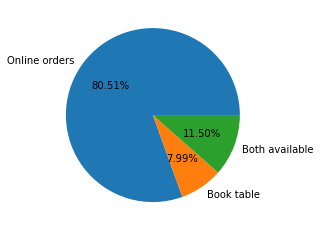

In [88]:
plt.pie(the_counts,labels=naming,autopct='%1.2f%%')
plt.show

In [89]:
#ratio between restaurants that provide and do not provide online booking

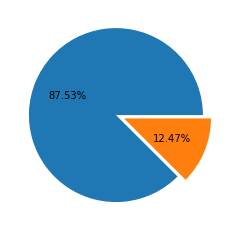

In [90]:
x=m1['book_table'].value_counts()
labels=['not booked','booked']
plt.pie(x,explode=[0.0,0.1],autopct='%1.2f%%')
plt.show()

In [91]:
#top 5 restaurants with highest votes

In [92]:
names2=filter_data.groupby('name')

In [93]:
top_rest=names2.sum().sort_values('votes',ascending=False).head()

In [94]:
top_rest['votes']

name
Onesta               347520
Truffles             301059
Empire Restaurant    229808
Hammered             180602
The Black Pearl      172122
Name: votes, dtype: int64

In [95]:
top_restaurants=top_rest.index
top_votes=top_rest['votes']

Text(0.5, 1.0, 'Rest with highest votes')

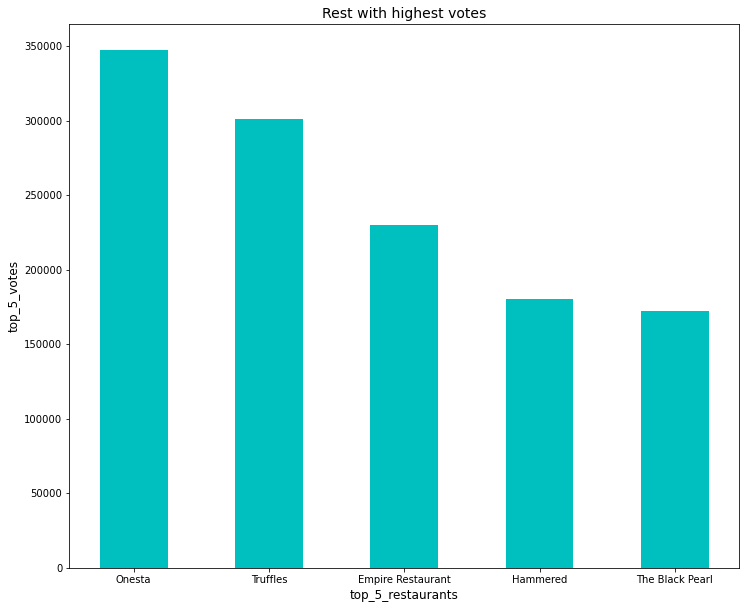

In [96]:
figure=plt.figure(figsize=(12,10))
plt.bar(top_restaurants,top_votes,width=0.5,color='c')
plt.xlabel('top_5_restaurants',size=12)
plt.ylabel('top_5_votes',size=12)
plt.title('Rest with highest votes',size=14)

In [97]:
#5 restaurants with least votes

In [98]:



names2['votes'].sum().sort_values(ascending=False).tail(5)

name
Grilled Fish        0
Grill Zone          0
Rahamans Mess       0
Rahar Momo  Cane    0
sCoolMeal           0
Name: votes, dtype: int64

In [99]:
# 5 most expensive restaurants

In [100]:
new88=filter_data.sort_values('costof2people',ascending=False)
new99=new88.drop_duplicates(subset='name').head()
new99

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costof2people,menu_item,listed_in(type),listed_in(city),per of good reviews,per of bad reviews,per of avg reviews
45618,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature The Leela Palace,No,Yes,4.3,128,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000.0,[],Dine-out,Old Airport Road,100.0,0.0,0.0
40266,"ITC Windsor, 25 Windsor Square, Sankey Road, B...",Royal Afghan ITC Windsor,No,Yes,4.3,413,Sankey Road,Fine Dining,"Dal Bukhara, Chocolate Cake, Butter Chicken, N...","North Indian, Mughlai",5000.0,[],Dine-out,Malleshwaram,100.0,0.0,0.0
41591,"Radisson Blu, 90/4, Outer Ring Road, Munnekoll...",Malties Radisson Blu,No,No,4.3,53,Marathahalli,Lounge,"Cocktails, Jumbo Prawns, Charcuterie Platter, ...","Continental, Fast Food",4500.0,[],Dine-out,Marathahalli,75.0,0.0,25.0
39125,"Le Meridien, 28, Sankey Road, Bangalore",La Brasserie Le Meridien,No,Yes,4.1,309,Sankey Road,Fine Dining,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...","North Indian, Continental, Japanese, Chinese, ...",4100.0,[],Dine-out,Lavelle Road,66.7,8.3,25.0
12677,"The Ritz-Carlton, 99, Residency Road, Bangalore",Riwaz The RitzCarlton,No,Yes,4.1,270,Residency Road,"Fine Dining, Bar","Tandoori Broccoli, Dal Makhani, Tamatar Ka Sho...",North Indian,4000.0,[],Dine-out,Church Street,66.7,33.3,0.0


In [101]:
#top 5 cheapest restaurants

In [102]:
cheap_restaur=filter_data.sort_values('costof2people',ascending=True)

In [103]:
top_cheap_rest=cheap_restaur.drop_duplicates(subset='name').head()

In [104]:
top_cheap_rest

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costof2people,menu_item,listed_in(type),listed_in(city),per of good reviews,per of bad reviews,per of avg reviews
12232,"68, Appareddy Palya, Near ESI Hospital, HAL 2n...",Srinidhi Sagar Food Line,Yes,No,3.7,129,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40.0,"['2 Idly and 1 Vada', 'Rice Bath', 'Poori', 'M...",Delivery,Church Street,50.0,50.0,0.0
27091,"412, Seventh Cross, Domlur, Bangalore",Srinidhi Sagar Deluxe,Yes,No,3.6,108,Domlur,Quick Bites,"Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...","South Indian, North Indian, Chinese",40.0,[],Delivery,Koramangala 4th Block,33.3,0.0,66.7
17773,"4, 19th Main Road, 6th Cross, Kodihalli, Old A...",Srinidhi Sagar,Yes,No,3.9,160,Old Airport Road,Quick Bites,"Masala Dosa, Rava Dosa, Rava Idli, Filter Coff...","South Indian, North Indian, Chinese",40.0,[],Delivery,Indiranagar,50.0,0.0,50.0
11653,"23, HKP Road Broadway",Savera Cafe,No,No,3.7,11,Shivajinagar,Cafe,dish unavailable,Cafe,50.0,[],Cafes,Church Street,75.0,0.0,25.0
1892,"Rangaiah Building, Begur, Koppa Road, Yelenaha...",Bread Better,No,No,3.7,0,Bannerghatta Road,Bakery,dish unavailable,"Bakery, Fast Food",50.0,[],Desserts,Bannerghatta Road,100.0,0.0,0.0


In [105]:
#restaurants grouped on the basis of restaurant type

In [106]:
grp_listed=filter_data.groupby('listed_in(type)')
rest_grp_type=grp_listed.count()
rest_grp_type['name']


listed_in(type)
Buffet                  881
Cafes                  1723
Delivery              25906
Desserts               3593
Dine-out              17774
Drinks & nightlife     1101
Pubs and bars           696
Name: name, dtype: int64

In [107]:
x_axis=rest_grp_type.index
y_axis=rest_grp_type['name']

Text(0.5, 1.0, 'rest based on type')

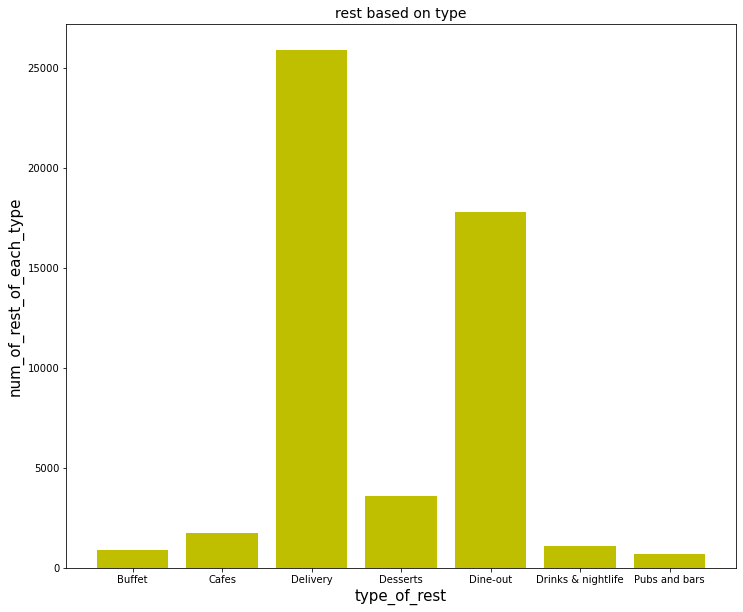

In [108]:
figure=plt.figure(figsize=(12,10))
plt.bar(x_axis,y_axis,color='y')
plt.xlabel('type_of_rest',size=15)
plt.ylabel('num_of_rest_of_each_type',size=15)
plt.title('rest based on type',size=14)

In [109]:
#restaurants that has highest rating in each type 

In [110]:
highest_rating=grp_listed[['name','rate']].max()

In [111]:
highest_rating

,name,rate
listed_in(type),,
Buffet,b Caf ShangriLa Hotel,4.9
Cafes,refuel,4.7
Delivery,sCoolMeal,4.9
Desserts,iFruit Live Ice Creams,4.9
Dine-out,repEAT Hub,4.9
Drinks & nightlife,iBar The Park Bangalore,4.9
Pubs and bars,recess Hilton Bangalore Embassy GolfLinks,4.9


In [112]:
x_high=highest_rating.index
y_high=highest_rating['rate']

Text(0.5, 1.0, 'highest rating in each type')

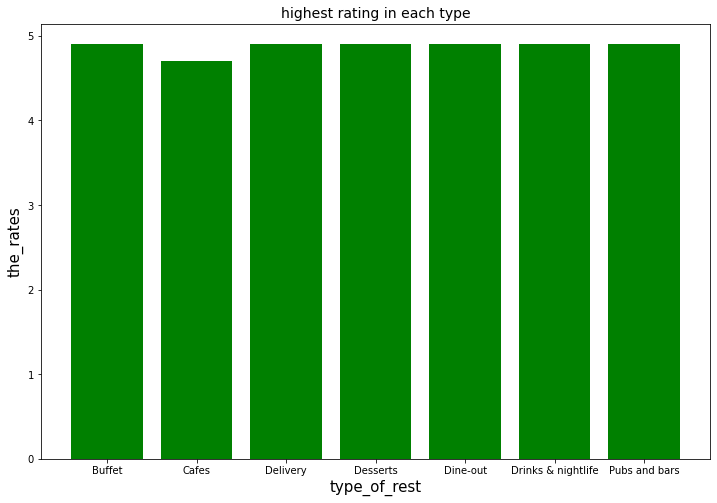

In [113]:
figure=plt.figure(figsize=(12,8))
plt.bar(x_high,y_high,color='g')
plt.xlabel('type_of_rest',size=15)
plt.ylabel('the_rates',size=15)
plt.title('highest rating in each type',size=14)

In [114]:
#restaurants that has lowest rating in each type 

In [115]:
lowest_ratings=grp_listed[['name','rate']].min()

In [116]:
lowest_ratings

,name,rate
listed_in(type),,
Buffet,12th Main Grand Mercure,2.3
Cafes,154 Breakfast Club,2.3
Delivery,Biryani Central,2.0
Desserts,1 Fahreheit,2.4
Dine-out,Biryani Central,1.8
Drinks & nightlife,1131 Bar Kitchen,2.0
Pubs and bars,1131 Bar Kitchen,2.4


In [117]:
x_low=lowest_ratings.index
y_low=lowest_ratings['rate']

Text(0.5, 1.0, 'lowest rating in each type')

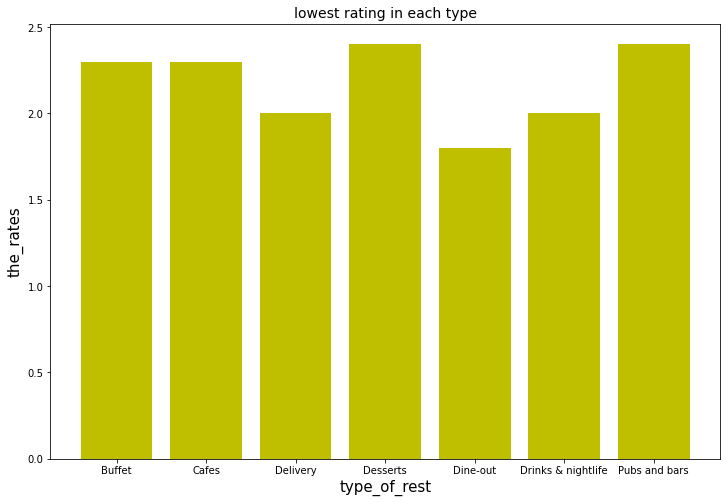

In [118]:
figure=plt.figure(figsize=(12,8))
plt.bar(x_low,y_low,color='y')
plt.xlabel('type_of_rest',size=15)
plt.ylabel('the_rates',size=15)
plt.title('lowest rating in each type',size=14)

In [119]:
#most expensive restaurant in each type

In [120]:
most_expensive_rest=grp_listed[['name','costof2people']].max()
most_expensive_rest

,name,costof2people
listed_in(type),,
Buffet,b Caf ShangriLa Hotel,4100.0
Cafes,refuel,2500.0
Delivery,sCoolMeal,3000.0
Desserts,iFruit Live Ice Creams,2200.0
Dine-out,repEAT Hub,6000.0
Drinks & nightlife,iBar The Park Bangalore,4500.0
Pubs and bars,recess Hilton Bangalore Embassy GolfLinks,4000.0


In [121]:
x_exp=most_expensive_rest.index
y_exp=most_expensive_rest['costof2people']

Text(0.5, 1.0, 'Most expensive in each type')

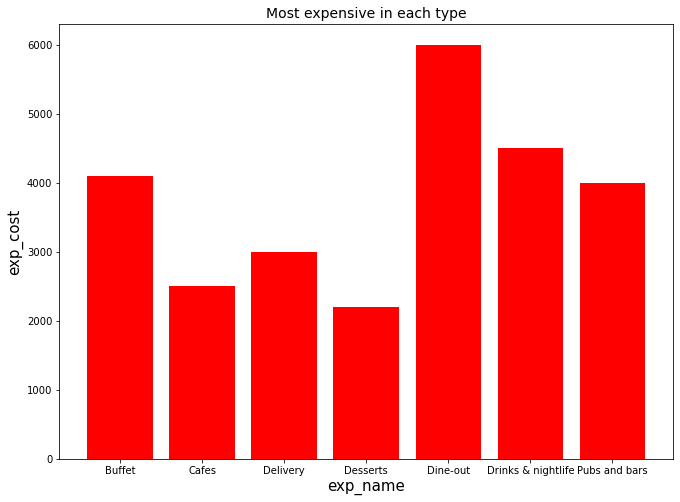

In [122]:
figure=plt.figure(figsize=(11,8))
plt.bar(x_exp,y_exp,color='r')
plt.xlabel('exp_name',size=15)
plt.ylabel('exp_cost',size=15)
plt.title('Most expensive in each type',size=14)

In [123]:
#cheapest restaurant in each type

In [124]:
most_cheap_rest=grp_listed[['name','costof2people']].min()
most_cheap_rest

,name,costof2people
listed_in(type),,
Buffet,12th Main Grand Mercure,300.0
Cafes,154 Breakfast Club,50.0
Delivery,Biryani Central,40.0
Desserts,1 Fahreheit,50.0
Dine-out,Biryani Central,40.0
Drinks & nightlife,1131 Bar Kitchen,150.0
Pubs and bars,1131 Bar Kitchen,150.0


In [125]:
x_cheap=most_cheap_rest.index
y_cheap=most_cheap_rest['costof2people']

Text(0.5, 1.0, 'Most cheap in each type')

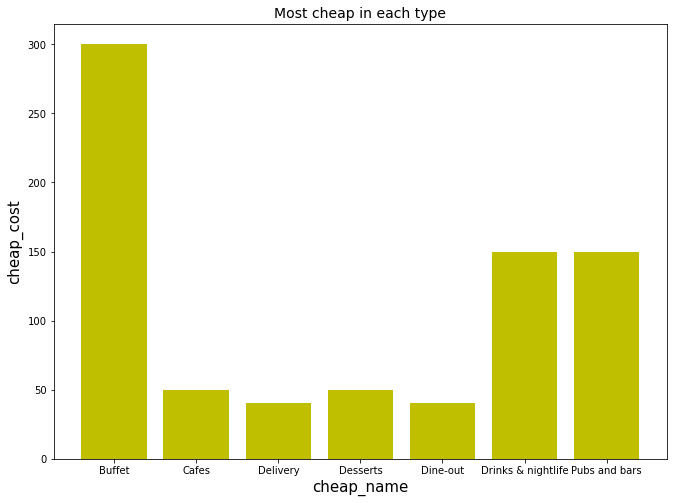

In [126]:
figure=plt.figure(figsize=(11,8))
plt.bar(x_cheap,y_cheap,color='y')
plt.xlabel('cheap_name',size=15)
plt.ylabel('cheap_cost',size=15)
plt.title('Most cheap in each type',size=14)

In [127]:
#restaurant with highest rating for each type of cuisines

In [128]:
cusine_grp=filter_data.groupby('cuisines')

In [129]:
cusine_grp[['name','rate']].max()

,name,rate
cuisines,,
"African, Burger",Galitos,4.6
"African, Burger, Desserts, Beverages, Fast Food",Galitos,4.6
American,Vimmis Cafe,4.2
"American, Asian, Continental, North Indian, South Indian, Chinese",Tapout Tavern,4.1
"American, Asian, European, North Indian",Monkey Bar,4.3
...,...,...
"Turkish, Rolls",Tarbouche,4.1
Vietnamese,Vietnamese Kitchen,4.4
"Vietnamese, Salad",Phobidden Fruit,4.4


In [130]:
#restaurant with lowest rating for each type of cuisines

In [131]:
cusine_grp[['name','rate']].min()

,name,rate
cuisines,,
"African, Burger",Galitos,4.5
"African, Burger, Desserts, Beverages, Fast Food",Galitos,4.6
American,Mayo N Burger,2.7
"American, Asian, Continental, North Indian, South Indian, Chinese",Tapout Tavern,4.1
"American, Asian, European, North Indian",Monkey Bar,4.3
...,...,...
"Turkish, Rolls",Tarbouche,3.7
Vietnamese,Blue Ginger The Taj West End,3.1
"Vietnamese, Salad",Phobidden Fruit,4.4


In [132]:
#top 5 locations that has highest number of restaurants

In [133]:
location_grp=filter_data.groupby('location')['name'].count()

In [134]:
location_grp.sort_values(ascending=False).head(5)

location
BTM                      5114
HSR                      2522
Koramangala 5th Block    2503
JP Nagar                 2234
Whitefield               2142
Name: name, dtype: int64

In [135]:
#highest rated restaurant in each location

In [136]:
grp_loc_high=filter_data.groupby('location')
grp_loc_high[['name','rate']].max()

,name,rate
location,,
BTM,sCoolMeal,4.9
Banashankari,Yo Roll Corner,4.7
Banaswadi,Zam Zam Restaurant,4.4
Bannerghatta Road,refuel,4.6
Basavanagudi,Zephyr,4.8
...,...,...
Whitefield,nutree,4.9
Wilson Garden,Vijaya Sagar,4.0
Yelahanka,Twist N Roll,3.9


In [137]:
#lowest rated restaurant in each location

In [138]:
grp_loc_high[['name','rate']].min()

,name,rate
location,,
BTM,100C,2.4
Banashankari,1947,2.5
Banaswadi,29 Degrees North,2.3
Bannerghatta Road,4671 Indian Coastal Cuisine,2.2
Basavanagudi,1980s Games Cafe,2.5
...,...,...
Whitefield,4700BC Popcorn,2.4
Wilson Garden,3 Spice,3.0
Yelahanka,Chetas Kitchen,3.4


In [139]:
#most expensive restaurant in each location

In [140]:
grp_loc_high[['name','costof2people']].max()

,name,costof2people
location,,
BTM,sCoolMeal,1600.0
Banashankari,Yo Roll Corner,1300.0
Banaswadi,Zam Zam Restaurant,1300.0
Bannerghatta Road,refuel,1700.0
Basavanagudi,Zephyr,2200.0
...,...,...
Whitefield,nutree,3000.0
Wilson Garden,Vijaya Sagar,1000.0
Yelahanka,Twist N Roll,555.0


In [141]:
#most cheap restaurant in each location

In [142]:
grp_loc_high[['name','costof2people']].min()

,name,costof2people
location,,
BTM,100C,70.0
Banashankari,1947,80.0
Banaswadi,29 Degrees North,100.0
Bannerghatta Road,4671 Indian Coastal Cuisine,50.0
Basavanagudi,1980s Games Cafe,100.0
...,...,...
Whitefield,4700BC Popcorn,100.0
Wilson Garden,3 Spice,100.0
Yelahanka,Chetas Kitchen,250.0


In [143]:
#number of restaurant in each city

In [144]:
city=zomato_data.copy()

In [145]:
city.drop_duplicates(subset=['address','name'],inplace=True)

In [146]:
group_city=city.groupby('listed_in(city)')

In [147]:
restaur_each_city=group_city.count()
restaur_each_city['name']

listed_in(city)
BTM                      1456
Banashankari              600
Bannerghatta Road        1079
Basavanagudi              392
Bellandur                 794
Brigade Road             1049
Brookefield               992
Church Street             103
Electronic City           733
Frazer Town               277
HSR                       466
Indiranagar               764
JP Nagar                   86
Jayanagar                 142
Kalyan Nagar              729
Kammanahalli               40
Koramangala 4th Block     282
Koramangala 5th Block      20
Koramangala 6th Block      25
Koramangala 7th Block      28
Lavelle Road              128
MG Road                    13
Malleshwaram              701
Marathahalli              359
New BEL Road              323
Old Airport Road           67
Rajajinagar               264
Residency Road              9
Sarjapur Road             101
Whitefield                477
Name: name, dtype: int64

In [148]:
x_city=restaur_each_city.index
y_city=restaur_each_city['name']

Text(0.5, 1.0, 'total num of restaurants in each city')

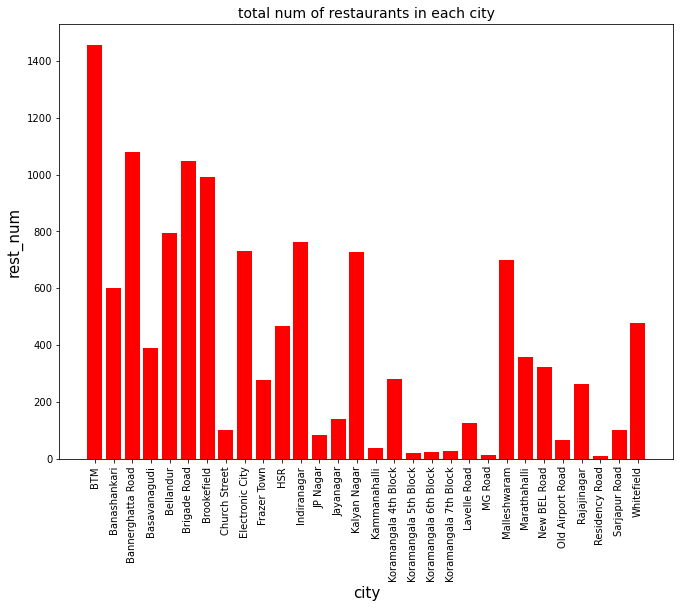

In [149]:
figure=plt.figure(figsize=(11,8))
plt.xticks(rotation=90)
plt.bar(x_city,y_city,color='r')
plt.xlabel('city',size=15)
plt.ylabel('rest_num',size=15)
plt.title('total num of restaurants in each city',size=14)

In [150]:
#highest rated restaurant in each city

In [151]:
city_group=filter_data.groupby('listed_in(city)')
city_group[['name','rate']].max()

,name,rate
listed_in(city),,
BTM,sCoolMeal,4.9
Banashankari,Zephyr,4.7
Bannerghatta Road,refuel,4.7
Basavanagudi,eatfit,4.8
Bellandur,nutree,4.9
Brigade Road,iBar The Park Bangalore,4.9
Brookefield,nutree,4.9
Church Street,iBar The Park Bangalore,4.9
Electronic City,nutree,4.7


In [152]:
#lowest rated rest in each city

In [153]:
city_group[['name','rate']].min()

,name,rate
listed_in(city),,
BTM,1000 BC,2.2
Banashankari,1947,2.5
Bannerghatta Road,247 Food Service,2.2
Basavanagudi,1441 Pizzeria,2.5
Bellandur,The Bbq,2.1
Brigade Road,1Q1,1.8
Brookefield,Biryani Central,2.1
Church Street,1Q1,1.8
Electronic City,11 to 11 Express Biriyanis,2.4


In [154]:
#most expensive restaurant in each city

In [155]:
city_group[['name','costof2people']].max()

,name,costof2people
listed_in(city),,
BTM,sCoolMeal,2500.0
Banashankari,Zephyr,1500.0
Bannerghatta Road,refuel,1700.0
Basavanagudi,eatfit,2200.0
Bellandur,nutree,2500.0
Brigade Road,iBar The Park Bangalore,4000.0
Brookefield,nutree,3000.0
Church Street,iBar The Park Bangalore,4000.0
Electronic City,nutree,3000.0


In [156]:
#cheapest restaurant in each city

In [157]:
city_group[['name','costof2people']].min()

,name,costof2people
listed_in(city),,
BTM,1000 BC,70.0
Banashankari,1947,80.0
Bannerghatta Road,247 Food Service,50.0
Basavanagudi,1441 Pizzeria,100.0
Bellandur,The Bbq,100.0
Brigade Road,1Q1,40.0
Brookefield,Biryani Central,100.0
Church Street,1Q1,40.0
Electronic City,11 to 11 Express Biriyanis,60.0


In [158]:
#number of restaurant grouped on the basis of rating 

In [159]:
rate_group=filter_data.groupby('rate')

In [160]:
rate_group_data=rate_group.count()
rate_group_data['name']

rate
1.8        5
2.0       11
2.1       24
2.2       26
2.3       51
2.4       70
2.5      101
2.6      260
2.7      307
2.8      600
2.9      802
3.0     1022
3.1     1561
3.2     1872
3.3     2305
3.4     2473
3.5     2783
3.6     3315
3.7    13856
3.8     3870
3.9     3968
4.0     3182
4.1     2945
4.2     2183
4.3     1691
4.4     1147
4.5      656
4.6      300
4.7      167
4.8       66
4.9       55
Name: name, dtype: int64

In [161]:
x_rate=rate_group_data.index
y_rate=rate_group_data['name']

Text(0.5, 1.0, 'restaurants grouped on the basis of ratings')

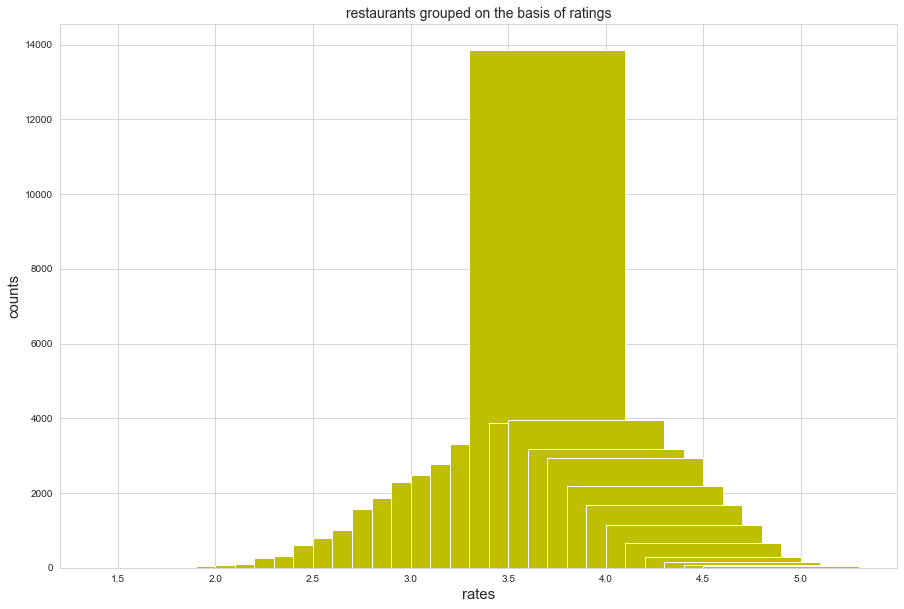

In [162]:
figure=plt.figure(figsize=(15,10))
sns.set_style(style='whitegrid')
plt.bar(x_rate,y_rate,color='y')
plt.xlabel('rates',size=15)
plt.ylabel('counts',size=15)
plt.title('restaurants grouped on the basis of ratings',size=14)

In [163]:
#restaurants that hs 100% good review

In [164]:
filter_data[filter_data['per of good reviews']==100]

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costof2people,menu_item,listed_in(type),listed_in(city),per of good reviews,per of bad reviews,per of avg reviews
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel Bar Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,dish unavailable,"North Indian, South Indian, Andhra, Chinese",800.0,[],Buffet,Banashankari,100.0,0.0,0.0
19,"47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...",360 Atoms Restaurant And Cafe,Yes,No,3.1,13,Banashankari,Cafe,dish unavailable,"Cafe, Chinese, Continental, Italian",400.0,[],Cafes,Banashankari,100.0,0.0,0.0
23,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600.0,[],Cafes,Banashankari,100.0,0.0,0.0
27,"1036, Srinidhi Plaza, 3rd floor, Above Nilgiri...",Sea Green Cafe,No,No,3.3,4,Banashankari,Cafe,dish unavailable,"Cafe, Fast Food, Beverages",500.0,[],Cafes,Banashankari,100.0,0.0,0.0
29,"112, Bull Temple Road,next to more Basavanagud...",Srinathjis Cafe,No,No,3.8,148,Basavanagudi,"Casual Dining, Cafe","Paratha, Sandwich, Chilli Idli, Noodles, Sandw...","North Indian, Cafe, Chinese, Fast Food",550.0,[],Cafes,Banashankari,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51698,"3-A1, Kundanahalli Main Road, Mahadevpura, Opp...",Kava Kitchen Bar Fairfield by Marriott,No,No,3.9,74,Whitefield,"Casual Dining, Bar",Dal Halwa,"North Indian, South Indian, Continental, Ameri...",1200.0,[],Pubs and bars,Whitefield,100.0,0.0,0.0
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,[],Pubs and bars,Whitefield,100.0,0.0,0.0
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar",dish unavailable,"North Indian, Continental",800.0,[],Pubs and bars,Whitefield,100.0,0.0,0.0
51710,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,3.7,0,Whitefield,Bar,dish unavailable,Finger Food,900.0,[],Pubs and bars,Whitefield,100.0,0.0,0.0


In [165]:
#restaurants that hs 100% bad review

In [166]:
filter_data[filter_data['per of bad reviews']==100]

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costof2people,menu_item,listed_in(type),listed_in(city),per of good reviews,per of bad reviews,per of avg reviews
16,"241, 4th Floor, 100 Feet Ring Road, Opposite K...",Catchupino,Yes,No,3.9,133,Banashankari,Cafe,"Momos, Mushroom Bruschettas, Jalapeno Cheeseba...","Cafe, Fast Food, Continental, Chinese, Momos",800.0,[],Cafes,Banashankari,0.0,100.0,0.0
50,"276, Ground Floor, 100 Feet Outer Ring Road, B...",Petoo,No,No,3.7,21,Banashankari,Quick Bites,dish unavailable,North Indian,450.0,[],Delivery,Banashankari,0.0,100.0,0.0
90,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,3.7,0,Banashankari,Delivery,dish unavailable,"Bakery, Desserts",500.0,[],Delivery,Banashankari,0.0,100.0,0.0
110,"594, 24 The Cross BSK, Opposte Oriental Bank, ...",Hari Super Sandwich,No,No,3.7,0,Banashankari,"Takeaway, Delivery",dish unavailable,"Sandwich, Pizza, Beverages",200.0,[],Delivery,Banashankari,0.0,100.0,0.0
114,"Near Seetha Circle, Vivekananda Park Road, Gir...",Cake Bite,No,No,3.7,0,Banashankari,Bakery,dish unavailable,Bakery,300.0,[],Delivery,Banashankari,0.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51554,"2, Thubarahalli Bus Stop, Whitefield, Bangalore",Biryani Kabab,No,No,3.2,4,Whitefield,Quick Bites,dish unavailable,Biryani,150.0,[],Dine-out,Whitefield,0.0,100.0,0.0
51580,"Vijayalakshmi Colony, Opposite Canara Bank, Ka...",New Taj Darbar,No,No,3.1,6,Whitefield,Quick Bites,dish unavailable,"South Indian, Chinese, North Indian",300.0,[],Dine-out,Whitefield,0.0,100.0,0.0
51599,"9/91, 1st Floor, Near SKA Kalyan Mantapa, Vart...",Momo Time,Yes,No,3.7,0,Whitefield,Quick Bites,dish unavailable,"Momos, Chinese",300.0,[],Dine-out,Whitefield,0.0,100.0,0.0
51602,"201, Nallurhalli Road, Siddapura, Whitefield, ...",Indian Aroma Cafe,Yes,No,2.8,84,Whitefield,Quick Bites,dish unavailable,"North Indian, Chinese",300.0,"['Chicken Kabab [5 Pieces]', 'Chilli Chicken',...",Dine-out,Whitefield,0.0,100.0,0.0


In [167]:
#analyse approx cost of two people

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='costof2people', ylabel='Density'>

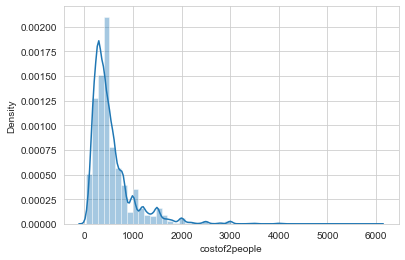

In [168]:
sns.distplot(m1['costof2people'])

In [169]:
#analysing relation in costof2people and rating

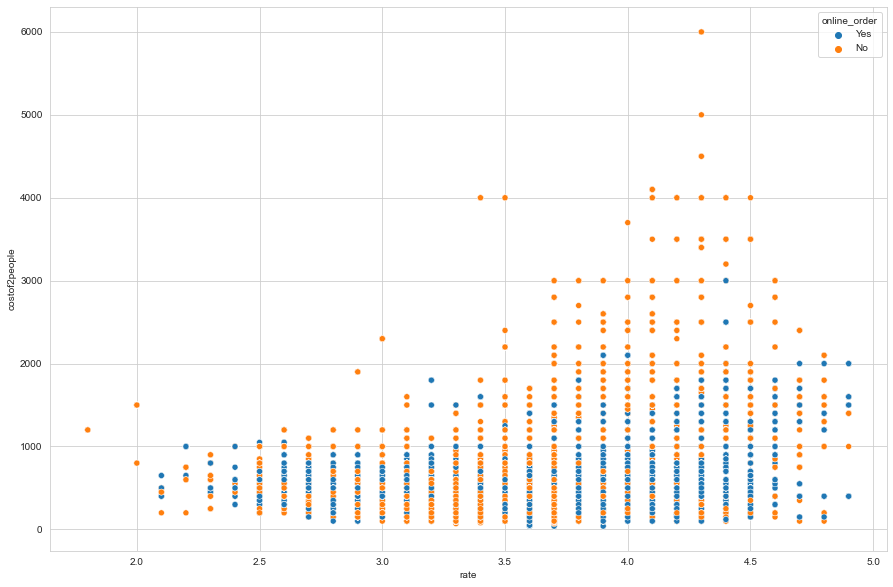

In [170]:
figure=plt.figure(figsize=(15,10))
sns.scatterplot(x='rate',y='costof2people',hue='online_order',data=m1)
plt.show()